In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc dữ liệu**

In [ ]:
def ReadData(f):
  X, y, lines = [], [], 0
  with open (f) as f:
    lines = f.readlines()
  for line in lines:
    temp = line.strip().split(',')
    X.append(int(temp[0]))
    y.append(float(temp[1]))
  return np.array(X), y

X_train, y_train = ReadData('TrainData.txt')
X_test_Data2, y_test_Data2 = ReadData('TestData.txt')   # Data2.txt
X_test_Data3, y_test_Data3 = ReadData('TestData_.txt')  # Data3.txt

**Data visualization**

Text(0.5, 1.0, 'Visualzation')

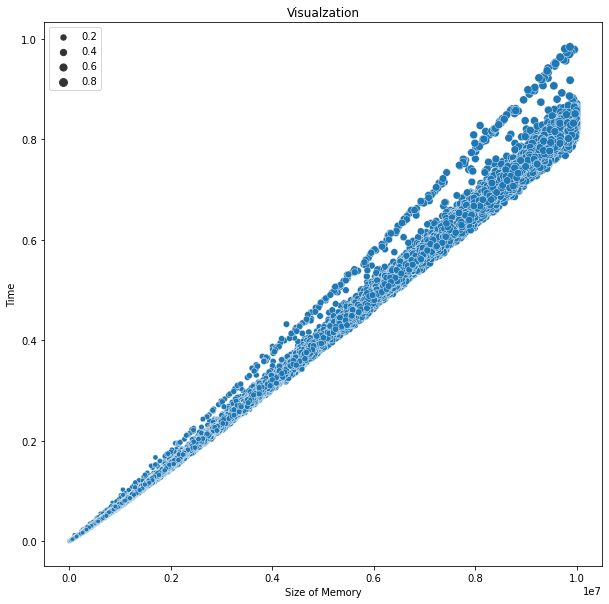

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train,y=y_train,size=y_train)
plt.xlabel('Size of Memory')
plt.ylabel('Time')
plt.title('Visualzation')

**Train data with One Variable Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Using StandardScaler before training
reg = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
model = reg.fit(X_train.reshape((-1,1)), y_train)
y_test_Data2_smpLG = model.predict(X_test_Data2.reshape((-1,1)))
print("R2_score with Linear Regression model:", r2_score(y_test_Data2, y_test_Data2_smpLG))

bias = model.named_steps.linearregression.coef_
weight = model.named_steps.linearregression.coef_
print("Weight of hypothesis function: w0 =", bias[0] , ", w1 =", weight[0])

R2_score with Linear Regression model: 0.9284132208349448
Weight of hypothesis function: w0 = 0.24374378967100443 , w1 = 0.24374378967100443


***Nhận xét:***

Model trên có score khá tốt trên tập test 

   Mô hình được đánh giá bằng $R^2$ score (hay r2_score):
  
  score = (1-u/v)
  + u: Tổng các square error (Tổng các (y_true - y_predict)**2)
  + v: Tổng các bình phương của (y_true - y_true.mean)**2
    Ta có: 1-u/v <= 1.0. Giá trị u/v càng nhỏ, model càng cho kết quả y_predict tốt. Nguyên nhân:
  + u/v nhỏ -> u gần với 0 hơn -> (y_true - y_predict)**2 ~ 0 -> y_predict ~ y_true
  + Giá trị v = sum((y_true - y_true.mean)**2) = const. Do đó v chỉ để giảm giá trị u xuống để R^2 score trưc quan hơn

  Đánh giá model bằng r2_score chỉ co cái nhìn trực quan hơn về khoảng cách giữa predicted labels như thế nào so với real labels (Trên thang giá trị từ ($-inf$, 1]. Vì vậy với model trên, r2_score = 0.99 không thể đánh giá model tốt hay không, chỉ cho ta thấy mức độ 'tốt' của model trên thang điểm của r2_score. Do đó trên thang điểm đó, em đánh giá model cho predict label trên testset là khá tốt vì nó tiệm cận 1

**Plot linear regression line on a scatter plot**

In [ ]:
X_forPlotting = np.array([i for i in range(255, 69999904, 10)])
y_forPlotting = model.predict(X_forPlotting.reshape(-1,1))

Text(0, 0.5, 'Time')

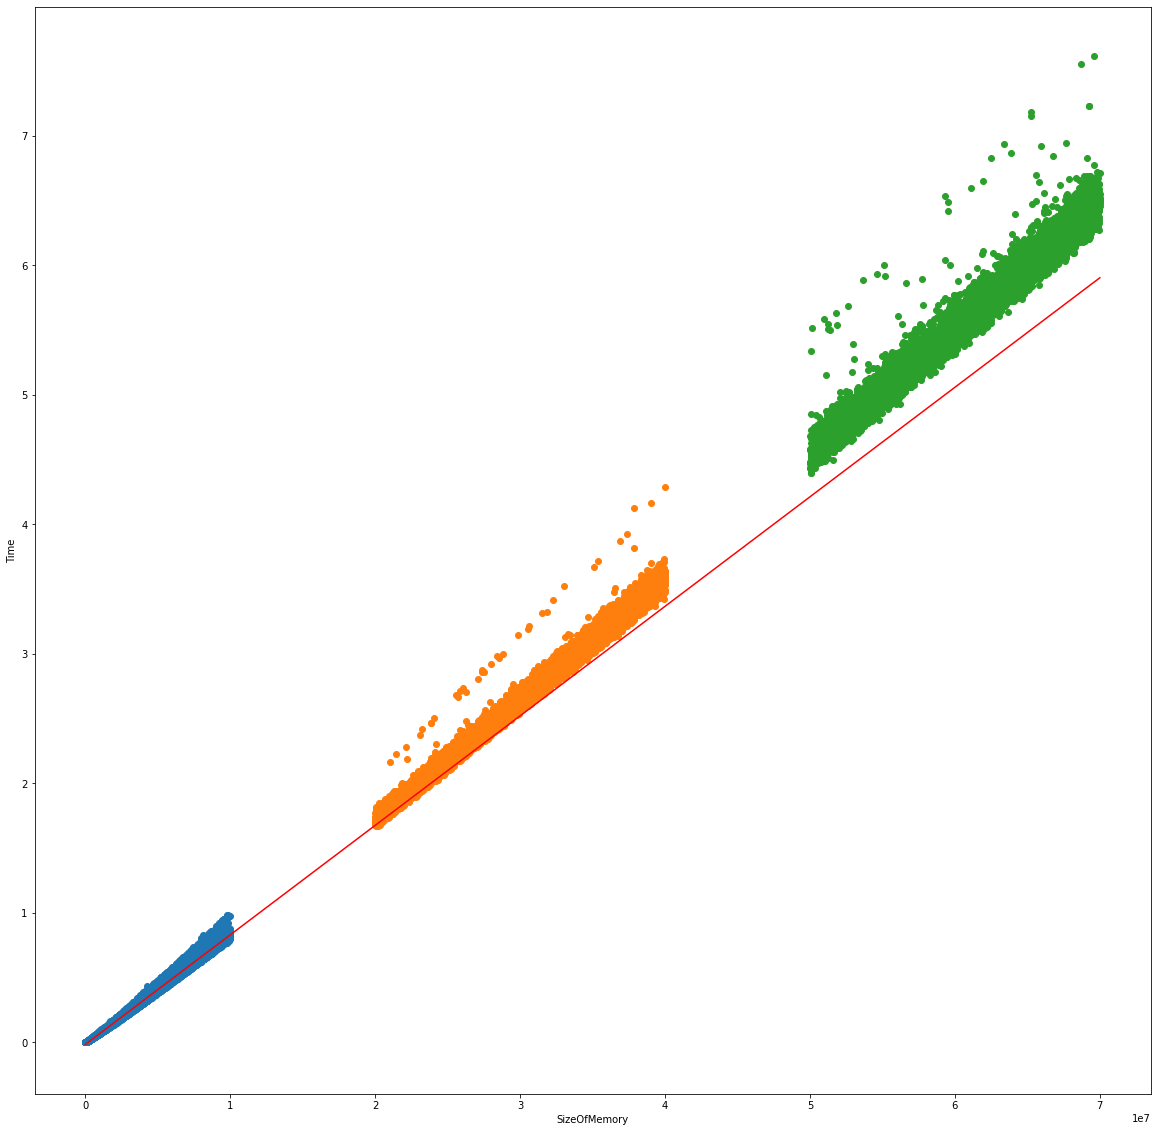

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(X_train, y_train)
plt.scatter(X_test_Data2, y_test_Data2)
plt.scatter(X_test_Data3, y_test_Data3)
plt.plot(X_forPlotting, y_forPlotting, c='r')
plt.xlabel('SizeOfMemory')
plt.ylabel('Time')

***Nhận xét:***

- Ta thấy khi sử dụng One Variable Linear Regression, Linear Regression Line có vẻ khá 'khớp' với trainingSet. Tuy nhiên, với testSet của Data2.txt và testSet của Data4.txt, Linear Regression Line lệch hẳn các điểm dữ liệu trên 2 testSet
- Tuy nhiên, ta cũng thấy trainSet có kích thước rất lớn nhưng input lại chỉ tập trung chủ yếu ở khoảng (0,1e7), trong khi đó 2 testSet thì input lại ở các vùng phân bố rất lớn. Do đó trainSet không mô tả chính xác tập dữ liệu của 2 testSet

**Multiple Regression**

In [ ]:
import math
def PreprocessingData(X_train):
  X1 = X_train.tolist()
  X2 = [math.sqrt(i) for i in X_train]
  X3 = [math.log(i) for i in X_train]
  X4 = [math.sqrt(i)*math.log(i) for i in X_train]
  X5 = [math.sqrt(i) for i in X2]
  X6 = [math.log(i) for i in X3]

  X_new = []
  X_new.append(X1)
  X_new.append(X2)
  X_new.append(X3)
  X_new.append(X4)
  X_new.append(X5)
  X_new.append(X6)
  X_new = np.array(X_new)
  return X_new.T

**Create more features**

In [ ]:
reg_MultiRe = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
model_MultiRe = reg_MultiRe.fit(PreprocessingData(X_train), y_train)
y_test_Data2_MultiRe = model_MultiRe.predict(PreprocessingData(X_test_Data2))
y_test_Data3_MultiRe = model_MultiRe.predict(PreprocessingData(X_test_Data3))
print("R2_score on Data3.txt:", r2_score(y_test_Data2, y_test_Data2_MultiRe))
print("R2_score on Data4.txt ", r2_score(y_test_Data3, y_test_Data3_MultiRe))

R2_score on Data3.txt: 0.986069461512715
R2_score on Data4.txt  0.9560010704345976


***Nhận xét:***
Ta thấy khi dùng Multiple Regression, model cho score ở 2 testSet trên cao hơn. Để có cái nhìn trực quan hên, ta nên plotData và Multiple Regression Line

In [ ]:
X_forPlotting = np.array([i for i in range(255, 69999904, 10)])
y_forPlotting = model_MultiRe.predict(PreprocessingData(X_forPlotting))

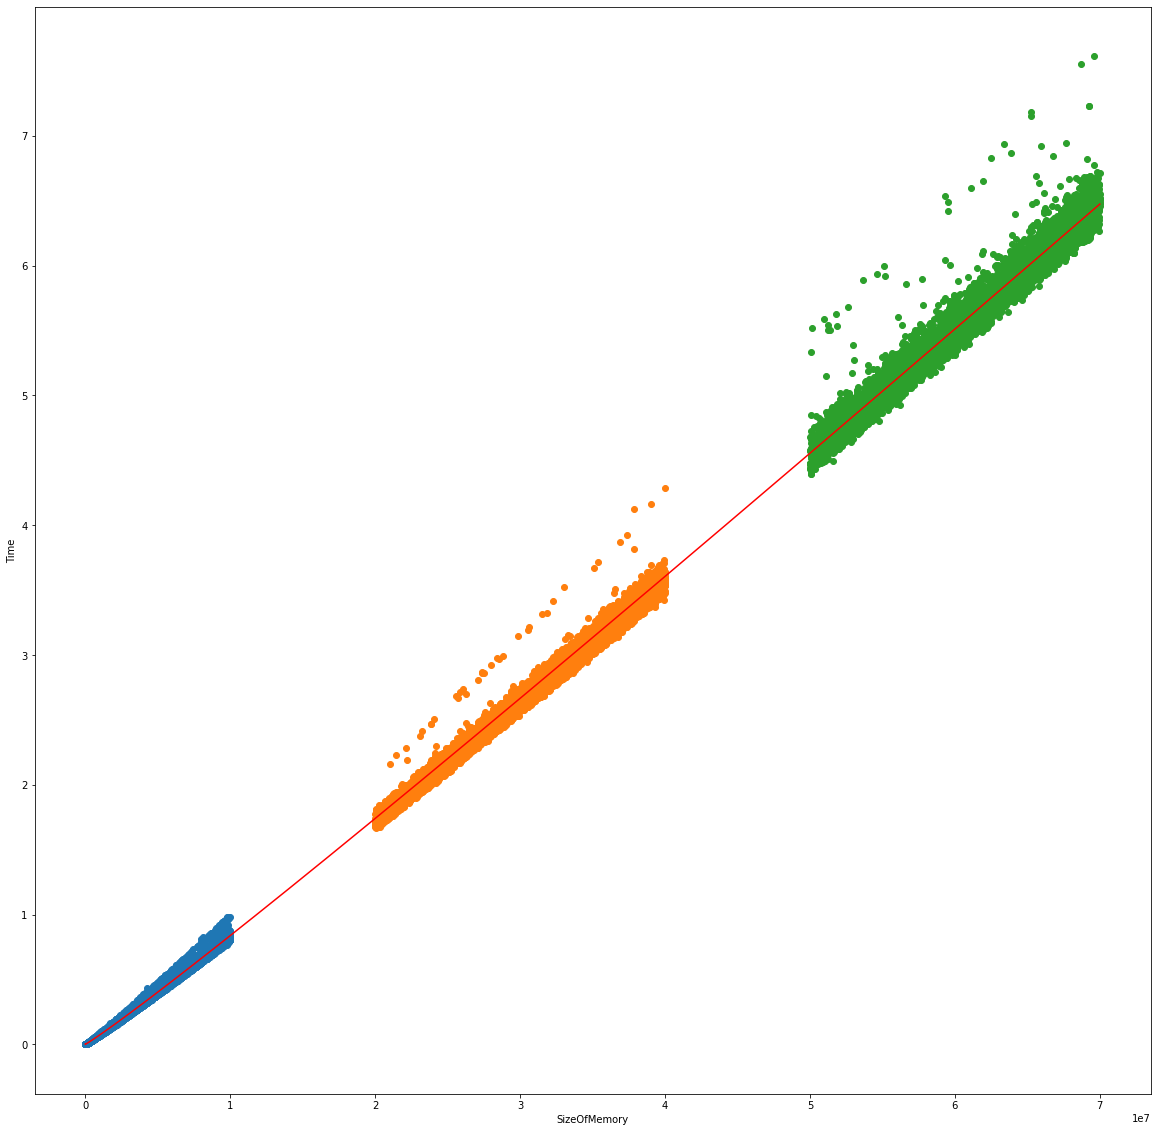

In [ ]:
test = plt.figure(figsize=(20,20))
test = plt.scatter(X_train, y_train)
test = plt.scatter(X_test_Data2, y_test_Data2)
test = plt.scatter(X_test_Data3, y_test_Data3)
test = plt.plot(X_forPlotting, y_forPlotting, c='r')
test = plt.xlabel('SizeOfMemory')
test = plt.ylabel('Time')

***Nhận xét***

Ở đây ta thấy Multiple Regression Line có vẻ 'khớp' với tập dữ liệu hơn so với ban nãy

**Reduce training Example**

In [ ]:
Threshold_ = []
r2_score_Data3 = []
r2_score_Data4 = []

for threshold in range (1000, 3500, 1):
  index = X_train[:]>=threshold*1e3
  X_train_new = X_train[index]
  y_train_new = np.array(y_train)
  y_train_new = y_train_new[index]
  y_train_new = y_train_new.tolist();

  reg_MultiRe_new = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
  model_MultiRe_new = reg_MultiRe_new.fit(PreprocessingData(X_train_new), y_train_new)
  y_test_Data2_MultiRe_new = model_MultiRe_new.predict(PreprocessingData(X_test_Data2))
  y_test_Data3_MultiRe_new = model_MultiRe_new.predict(PreprocessingData(X_test_Data3))
  Threshold_.append(threshold)
  r2_score_Data3.append(r2_score(y_test_Data2, y_test_Data2_MultiRe_new))
  r2_score_Data4.append(r2_score(y_test_Data3, y_test_Data3_MultiRe_new))

Text(0, 0.5, 'Time')

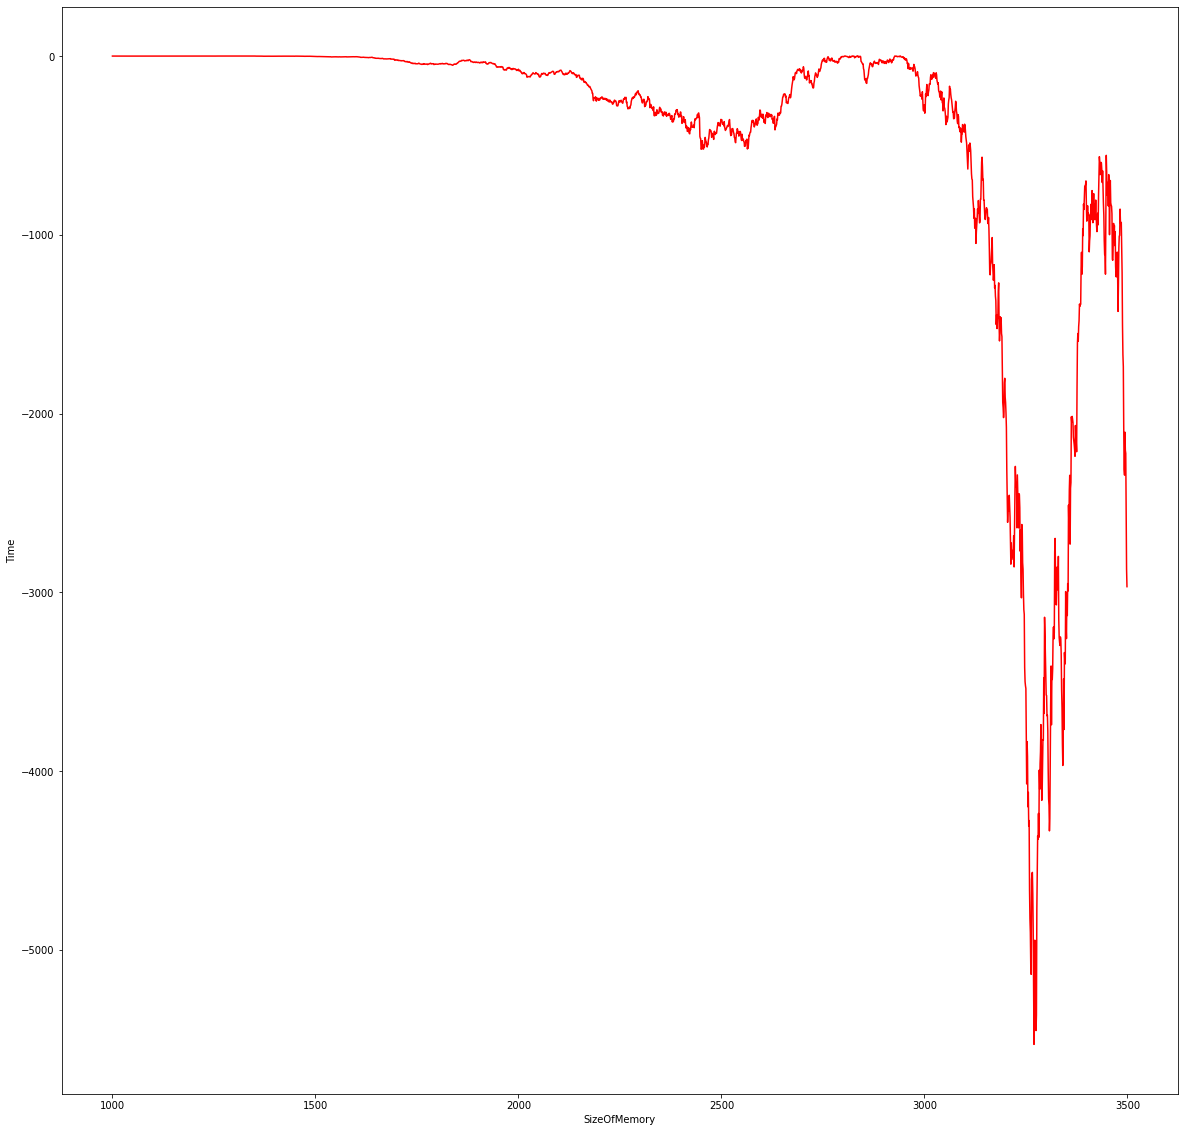

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(Threshold_, r2_score_Data4, c='r')
plt.xlabel('SizeOfMemory')
plt.ylabel('Time')

***Nhận xét***

- Khi ta cho Threshold chạy trên [1000,3500) thì R2_score có sự thay đổi bất thường. Ban đầu, việc giảm vài giá trị sẽ không mang lại quá nhiều sự thay đổi về r2_score (Threshold thấp, trong khoảng [1000, 2000)). Tuy nhiên nếu càng giảm giá trị thì có những lúc r2_score của model sẽ tăng lên rất cao nhưng cũng có thể giảm xuống rất thấp
- Với việc biểu diễn r2_score dựa trên SizeOfMemory, ta thấy có vẻ như trong trainSet, các trainExample sẽ phân bố ít ở khoảng (0, 22x1e5) trung bình ở các khoảng (22x1e5, 27x1e5) và phân bố rất mạnh ở khoảng 31x1e5 trở đi. Nguyên nhân do nếu ta bỏ đi các giá trị phía sau thì r2_score càng giảm rất nhiều, tức model càng bị ảnh hưởng do ít đi số lượng training Example

In [ ]:
print("Threshold :", Threshold_[ r2_score_Data4.index(np.max(r2_score_Data4)) ]*1e3 )
print("The highest score :", np.max(r2_score_Data4))

Threshold : 1190000.0
The highest score : 0.9552422644648526
